In [1]:
!pip install pgmpy
from pgmpy.base import DAG

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00


In [2]:
# @title 1. Librerias

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Modelos
# ==============================================================================
import networkx as nx
from pgmpy.factors.discrete import TabularCPD
from pgmpy.models import BayesianNetwork
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

#Librerias generales
import os
import random
import warnings
import numpy as np
import pandas as pd
from scipy.io import arff

#Librerias PGMPY
import pgmpy.estimators as ests
from pgmpy.estimators import TreeSearch
from pgmpy.inference import BeliefPropagation
from pgmpy.metrics import structure_score

#Librerias para aprendizaje automatico en Python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# @title 2.1. Crear el modelo Bayesiano

# Crear el modelo Bayesiano
model = BayesianNetwork()

edges = [
    ('frecuencia_pago','modo_pago'),
    ('modo_pago', 'cat_producto'),
    ('cat_producto', 'monto_de_compra'),
    ('canal_dist', 'cat_producto'),
    ('canal_dist', 'monto_de_compra'),
    ('TipoAuna/Onco', 'monto_de_compra'),
    ('rango_edad_contratante','TipoAuna/Onco'),
    ('sexo_contratante', 'TipoAuna/Onco'),
    ('tipo_documento_contratante', 'TipoAuna/Onco'),

]

model = BayesianModel(edges)

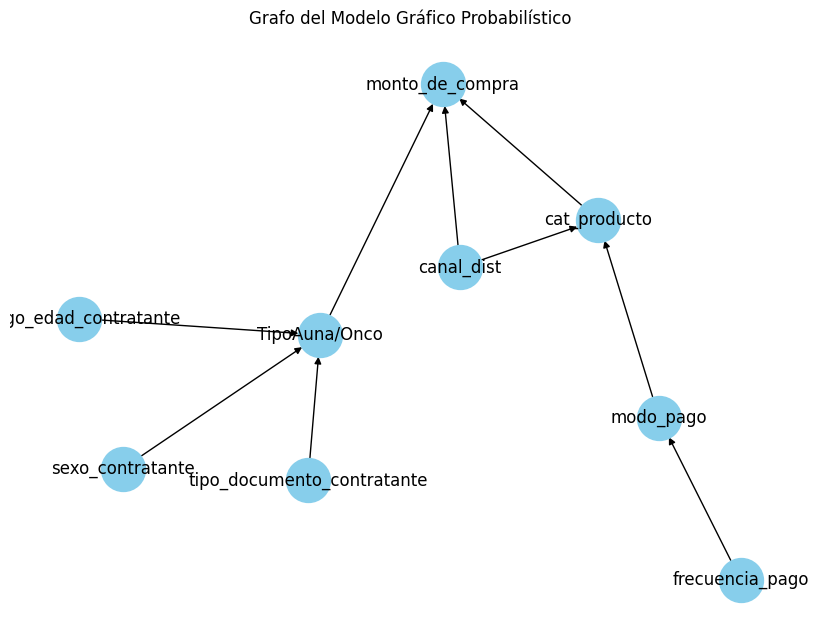

In [4]:
# @title 2.2. Grafo del modelo gráfico probabilistico

# Crear un grafo de NetworkX desde el modelo de pgmpy
nx_graph = nx.DiGraph(model.edges())

# Dibujar el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(nx_graph)  # Esto asigna posiciones a los nodos
nx.draw(nx_graph, pos, with_labels=True, node_size=1000, node_color='skyblue')
plt.title('Grafo del Modelo Gráfico Probabilístico')
plt.show()

In [5]:
# @title 2.3. Nodos, CPDs

# Agregar los nodos al modelo
model.add_nodes_from(['frecuencia_pago', 'modo_pago', 'cat_producto', 'canal_dist', 'TipoAuna/Onco', 'rango_edad_contratante', 'sexo_contratante', 'tipo_documento_contratante', 'monto_de_compra'])


# Definir los CPDs para cada variable
cpd_frecuencia_pago = TabularCPD(variable='frecuencia_pago', variable_card=6,
                                 values=[[0.0285905441570027],
                                         [0.000847457627118644],
                                         [0.000267618198037467],
                                         [0.969491525423729],
                                         [0.0000892060660124889],
                                         [0.000713648528099911]])

cpd_modo_pago = TabularCPD(variable='modo_pago', variable_card=2,
                           values=[[0.088923557, 1, 1, 0.0000460066249539934, 1, 1], [0.911076443, 0, 0, 0.999953993, 0, 0]],
                           evidence=['frecuencia_pago'], evidence_card=[6])

cpd_canal_dist = TabularCPD(variable='canal_dist', variable_card=5,
                            values=[[0.0243532560214095], [0.248438893844781], [0.283541480820696],
                                    [0.0696699375557538], [0.37399643175736]])

cpd_rango_edad_contratante = TabularCPD(variable='rango_edad_contratante', variable_card=3,
                                        values=[[0.386351471900089], [0.533273862622658], [0.0803746654772525]])

cpd_tipo_documento_contratante = TabularCPD(variable='tipo_documento_contratante', variable_card=2,
                                            values=[[0.992818911685995], [0.00718108831400532]])

cpd_sexo_contratante = TabularCPD(variable='sexo_contratante', variable_card=2,
                                  values=[[0.6127044228], [0.3872955772]])

cpd_cat_producto = TabularCPD(variable='cat_producto', variable_card=3,
                              values=[[1, 0, 0.876543209876543, 0.818181818181818, 1, 0.437728937728938, 0.617773788150808, 0.810047846889952, 0.202450032237266, 0.460078768349445],
                                      [0, 1, 0, 0, 0, 0.245421245421245, 0.254937163375224, 0.035725677830941, 0.355899419729207, 0.196920873612603],
                                      [0, 0, 0.123456790123457, 0.181818181818182, 0, 0.316849816849817, 0.127289048473968, 0.154226475279107, 0.441650548033527, 0.343000358037952]],evidence=['modo_pago','canal_dist'], evidence_card=[2,5])


cpd_des_producto = TabularCPD(variable='TipoAuna/Onco', variable_card=2,
                              values=[[0.706337775, 0.728595179, 0.608325449, 0.615384615, 0.619047619, 0, 0.670383732, 0.705122686, 0.518367347, 0.45, 0.46, 0.142857143],
                               [0.293662225, 0.271404821, 0.391674551, 0.384615385, 0.380952381, 1, 0.329616268, 0.294877314, 0.481632653, 0.55, 0.54, 0.857142857]],evidence=['rango_edad_contratante','sexo_contratante','tipo_documento_contratante'], evidence_card=[3,2,2])


cpd_monto_de_compra = TabularCPD(variable='monto_de_compra', variable_card=2,
                                 values=[[0.146443515, 1, 0.028901734, 0.5, 0.5, 0.5, 0.378275862, 0, 0.019746121, 1, 0.009232955, 0.5, 0.331062327, 0.5, 0.192771084, 1, 0.174107143, 0.045861298, 0.485943775, 0, 0.024096386, 1, 0.004950495, 0.121323529, 0.218598383, 0.5, 0.004126032, 1, 0.006060606, 0.221153846],
                                  [0.853556485, 0, 0.971098266, 0.5, 0.5, 0.5, 0.621724138, 1, 0.980253879, 0, 0.990767045, 0.5, 0.668937673, 0.5, 0.807228916, 0, 0.825892857, 0.954138702, 0.514056225, 1, 0.975903614, 0, 0.995049505, 0.878676471, 0.781401617, 0.5, 0.995873968, 0, 0.993939394, 0.778846154]
],evidence=['canal_dist','TipoAuna/Onco','cat_producto'], evidence_card=[5,2,3])

# Asociar los CPDs al modelo
model.add_cpds(cpd_frecuencia_pago, cpd_modo_pago, cpd_cat_producto, cpd_canal_dist, cpd_des_producto, cpd_rango_edad_contratante, cpd_sexo_contratante, cpd_tipo_documento_contratante, cpd_monto_de_compra)

model.check_model()

True

In [6]:
model.get_cpds()

[<TabularCPD representing P(frecuencia_pago:6) at 0x7be7820eae60>,
 <TabularCPD representing P(modo_pago:2 | frecuencia_pago:6) at 0x7be7820eaec0>,
 <TabularCPD representing P(cat_producto:3 | modo_pago:2, canal_dist:5) at 0x7be7820eaef0>,
 <TabularCPD representing P(canal_dist:5) at 0x7be7820eae30>,
 <TabularCPD representing P(TipoAuna/Onco:2 | rango_edad_contratante:3, sexo_contratante:2, tipo_documento_contratante:2) at 0x7be7820eaf80>,
 <TabularCPD representing P(rango_edad_contratante:3) at 0x7be7820eae90>,
 <TabularCPD representing P(sexo_contratante:2) at 0x7be7820eae00>,
 <TabularCPD representing P(tipo_documento_contratante:2) at 0x7be7820eadd0>,
 <TabularCPD representing P(monto_de_compra:2 | canal_dist:5, TipoAuna/Onco:2, cat_producto:3) at 0x7be7820eafe0>]

In [7]:
# @title 2.4.1. ¿Qué probabilidad se tiene para que una mujer compre un ticket alto a través de un canal digital?

# Definir un objeto VariableElimination usando el modelo previamente creado
inference = VariableElimination(model)

# Calcular la probabilidad condicional
result = inference.query(variables=['monto_de_compra'], evidence={'canal_dist': 1, 'cat_producto': 0})

# Imprimir el resultado
print(result)

+--------------------+------------------------+
| monto_de_compra    |   phi(monto_de_compra) |
+====================+========================+
| monto_de_compra(0) |                 0.6037 |
+--------------------+------------------------+
| monto_de_compra(1) |                 0.3963 |
+--------------------+------------------------+


In [8]:
# @title 2.4.2. ¿Cuál es la probabilidad que un hombre mayor adquiera producto oncológico con telemarketing?

# Definir un objeto VariableElimination usando el modelo previamente creado
inference = VariableElimination(model)

# Calcular la probabilidad condicional
result = inference.query(variables=['monto_de_compra'], evidence={'canal_dist': 1, 'sexo_contratante': 0})

# Imprimir el resultado
print(result)

+--------------------+------------------------+
| monto_de_compra    |   phi(monto_de_compra) |
+====================+========================+
| monto_de_compra(0) |                 0.3945 |
+--------------------+------------------------+
| monto_de_compra(1) |                 0.6055 |
+--------------------+------------------------+


In [9]:
# @title 2.4.3. ¿Cuál es la probabilidad de que personas mayores compren un producto de salud a través del canal digital?

# Calcular la probabilidad condicional
result = inference.query(variables=['monto_de_compra'], evidence={'sexo_contratante': 0, 'rango_edad_contratante': 0, 'canal_dist': 1})

# Imprimir el resultado
print(result)


+--------------------+------------------------+
| monto_de_compra    |   phi(monto_de_compra) |
+====================+========================+
| monto_de_compra(0) |                 0.3659 |
+--------------------+------------------------+
| monto_de_compra(1) |                 0.6341 |
+--------------------+------------------------+


In [10]:
# @title 2.4.4. ¿?

# Calcular la probabilidad condicional
result = inference.query(variables=['TipoAuna/Onco'], evidence={'sexo_contratante': 1, 'rango_edad_contratante': 2, 'canal_dist': 3})

# Imprimir el resultado
print(result)


+------------------+----------------------+
| TipoAuna/Onco    |   phi(TipoAuna/Onco) |
+==================+======================+
| TipoAuna/Onco(0) |               0.4577 |
+------------------+----------------------+
| TipoAuna/Onco(1) |               0.5423 |
+------------------+----------------------+


## Propuesta del Modelo

In [11]:
# @title 3.1. Cargar Data Set
archivo = 'Libro8_DataSet.xlsx'
df=pd.read_excel(archivo)
df

,sexo_contratante,cat_producto,des_producto,canal_dist,modo_pago,imp_bruto,rango_edad_norm,rango precio,TIPO DOC,Zona,Freq
0,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,1617.76,18-35,Alto,OTROS,OTROS,NO MENSUAL
1,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,2153.29,18-35,Alto,OTROS,OTROS,NO MENSUAL
2,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,1617.76,18-35,Alto,OTROS,OTROS,NO MENSUAL
3,Masculino,FULL PRICE,Oncologico,Digital,Pago recurrente,60.66,36-55,Bajo,OTROS,OTROS,MENSUAL
4,Masculino,LOW PRICE,Salud,Telemarketing.,Pago recurrente,4.36,36-55,Bajo,DNI,LIMA,MENSUAL
...,...,...,...,...,...,...,...,...,...,...,...
22415,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,6503.80,36-55,Alto,DNI,PROVINCIA,NO MENSUAL
22416,Femenino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,7470.81,36-55,Alto,DNI,PROVINCIA,NO MENSUAL
22417,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,7470.81,56 a mas,Alto,DNI,PROVINCIA,NO MENSUAL
22418,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,7470.81,56 a mas,Alto,DNI,PROVINCIA,NO MENSUAL


In [12]:
# @title 3.2. Crear el modelo Bayesiano
model = BayesianNetwork()

edges = [
    ('frecuencia_pago','modo_pago'),
    ('modo_pago', 'cat_producto'),
    ('cat_producto', 'monto_de_compra'),
    ('canal_dist', 'cat_producto'),
    ('canal_dist', 'monto_de_compra'),
    ('TipoAuna/Onco', 'monto_de_compra'),
    ('rango_edad_contratante','TipoAuna/Onco'),
    ('sexo_contratante', 'TipoAuna/Onco'),
    ('tipo_documento_contratante', 'TipoAuna/Onco'),

]
model = BayesianModel(edges)

In [13]:
# @title 3.3. Variables seleccionados
columnsString=['sexo_contratante','cat_producto','des_producto','canal_dist','modo_pago','rango_edad_norm','rango precio','TIPO DOC','Zona','Freq']

In [14]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()

#num_columns=df[columnsString].shape[1]

#for i in range(0, num_columns):  ## se toma la posisicon 4 para no tomar categoria renta y cotizacion, ya que no entran al modelo
#    column_name=df[columnsString].columns[i]
#    column_type=df[columnsString][column_name].dtypes
#    if column_type == 'object':
#        le.fit(df[column_name])
#        encoded_feature=le.transform(df[column_name])
#        df[column_name]=pd.DataFrame(encoded_feature)


In [15]:
df.dtypes

sexo_contratante     object
cat_producto         object
des_producto         object
canal_dist           object
modo_pago            object
imp_bruto           float64
rango_edad_norm      object
rango precio         object
TIPO DOC             object
Zona                 object
Freq                 object
dtype: object

In [16]:
df=df[['sexo_contratante','cat_producto','des_producto','canal_dist','modo_pago','rango_edad_norm','TIPO DOC','Zona','Freq','rango precio']]

In [17]:
X = (df.iloc[:, :-1])
y = (df.iloc[:, -1])

In [18]:

#Seleccionamos las 8 mejores variables de las 12 disponibles, ordenadas de mayor a menor puntaje obtenido (mayor correlacionadas)
#fs = SelectKBest(score_func=chi2, k=8)
#f_best = fs.fit_transform(X, y)

#top_features = sorted(zip(list(X.columns), fs.scores_), key=lambda x: x[1], reverse=True)
#top_features

In [19]:
data = df

#Adicionamos al dataset tambien el target
data[df.columns[-1]] = y
data.head()

,sexo_contratante,cat_producto,des_producto,canal_dist,modo_pago,rango_edad_norm,TIPO DOC,Zona,Freq,rango precio
0,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,18-35,OTROS,OTROS,NO MENSUAL,Alto
1,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,18-35,OTROS,OTROS,NO MENSUAL,Alto
2,Masculino,FULL PRICE,Salud,Fuerza de Ventas,Pago recurrente,18-35,OTROS,OTROS,NO MENSUAL,Alto
3,Masculino,FULL PRICE,Oncologico,Digital,Pago recurrente,36-55,OTROS,OTROS,MENSUAL,Bajo
4,Masculino,LOW PRICE,Salud,Telemarketing.,Pago recurrente,36-55,DNI,LIMA,MENSUAL,Bajo


In [20]:
# @title 3.4. Cantidad de observaciones o filas del conjunto de datos
df.shape[0]

22420

In [21]:
#Agrupamos todas las columnas del dataset en un grupo y lo dividimos entre la cantidad de observaciones
df.groupby([df.columns], axis=1).size()

Freq                1
TIPO DOC            1
Zona                1
canal_dist          1
cat_producto        1
des_producto        1
modo_pago           1
rango precio        1
rango_edad_norm     1
sexo_contratante    1
dtype: int64

In [22]:
#Cada una de las variables del dataframe tiene la misma probabilidad en el dataset
joint_probability = df.groupby([df.columns], axis=1).size()/df.shape[0]
pd.DataFrame(joint_probability)

,0
Freq,0.000045
TIPO DOC,0.000045
Zona,0.000045
canal_dist,0.000045
cat_producto,0.000045
des_producto,0.000045
modo_pago,0.000045
rango precio,0.000045
rango_edad_norm,0.000045
sexo_contratante,0.000045


Building tree:   0%|          | 0/45.0 [00:00<?, ?it/s]

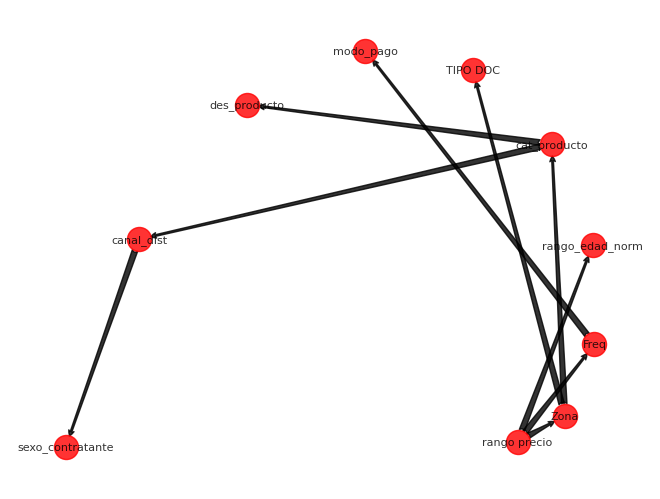

In [23]:
# @title 3.5. Grafo DAG

#Especificamos el nodo que debera ser el raiz utilizando el algoritmo de arboles pq el dataset tienen mas de 4 nodos o variables
est = TreeSearch(df, root_node='rango precio')
#En la variable dag contendremos la red bayesiana obtenida por Aprendizaje Estructurado utilizando el estimador de tipo chow-liu
dag = est.estimate(estimator_type='chow-liu')
#Mostramos el DAG con un layout de tipo spiral
pos = nx.spiral_layout(dag)
nx.draw(dag, pos=pos, with_labels=True,node_color='r', font_size=8, arrowstyle='fancy', alpha=0.8)
#Guardamos el grafo DAG en un archivo .png que podemos visualizar y/o descargar
plt.savefig('plt.png')

In [24]:
print("Nodos: ", dag.nodes())
print("---------------")
print("Aristas: ", dag.edges())

print("--------" "\n")

print("Origen y destino de las Aristas")
print("-------------------------------" "\n")
nx.to_pandas_edgelist(dag)

Nodos:  ['rango precio', 'Zona', 'Freq', 'rango_edad_norm', 'cat_producto', 'TIPO DOC', 'modo_pago', 'des_producto', 'canal_dist', 'sexo_contratante']
---------------
Aristas:  [('rango precio', 'Zona'), ('rango precio', 'Freq'), ('rango precio', 'rango_edad_norm'), ('Zona', 'cat_producto'), ('Zona', 'TIPO DOC'), ('Freq', 'modo_pago'), ('cat_producto', 'des_producto'), ('cat_producto', 'canal_dist'), ('canal_dist', 'sexo_contratante')]
--------

Origen y destino de las Aristas
-------------------------------



,source,target,weight
0,rango precio,Zona,None
1,rango precio,Freq,None
2,rango precio,rango_edad_norm,None
3,Zona,cat_producto,None
4,Zona,TIPO DOC,None
5,Freq,modo_pago,None
6,cat_producto,des_producto,None
7,cat_producto,canal_dist,None
8,canal_dist,sexo_contratante,None


In [25]:
#A partir del DAG (Grafo Dirigido Aciclico) creamos la red bayesiana
model = BayesianNetwork(dag)
#A partir del modelo creado generamos los CPDs automaticamente a partir del metod fit.
#El metodo fit lo aplicamos al modelo teniendo como parametro el conjunto de datos
model.fit(df)
model.get_cpds()

[<TabularCPD representing P(rango precio:2) at 0x7be78203cb50>,
 <TabularCPD representing P(Zona:3 | rango precio:2) at 0x7be78203fe80>,
 <TabularCPD representing P(Freq:2 | rango precio:2) at 0x7be78203f670>,
 <TabularCPD representing P(rango_edad_norm:3 | rango precio:2) at 0x7be78203e3b0>,
 <TabularCPD representing P(cat_producto:4 | Zona:3) at 0x7be77f643250>,
 <TabularCPD representing P(TIPO DOC:2 | Zona:3) at 0x7be77f643280>,
 <TabularCPD representing P(modo_pago:2 | Freq:2) at 0x7be77f643130>,
 <TabularCPD representing P(des_producto:2 | cat_producto:4) at 0x7be77f643a60>,
 <TabularCPD representing P(canal_dist:4 | cat_producto:4) at 0x7be77f6438e0>,
 <TabularCPD representing P(sexo_contratante:2 | canal_dist:4) at 0x7be77f6438b0>]

In [26]:
#la variable infer identifica el objeto que ejecutara el algoritmo de calculo de inferencias a partir del la Eliminacion de la Variable
infer = VariableElimination(model)

##**Validación de resultados**

In [27]:
# @title ¿Qué probabilidad se tiene para que una mujer compre un ticket alto a través de un canal digital?
q = infer.query(variables=["rango precio"], evidence={"canal_dist": 'Digital', "sexo_contratante": 'Femenino'}, joint=False)
for factor in q.values():
    print(factor)

print(factor.values[0])

print ("La probabilidad de que una mujer compre un ticket alto a través de un canal digital sería de: ", (factor.values[0])*100, "%")

+--------------------+---------------------+
| rango precio       |   phi(rango precio) |
+====================+=====================+
| rango precio(Alto) |              0.2699 |
+--------------------+---------------------+
| rango precio(Bajo) |              0.7301 |
+--------------------+---------------------+
0.2699189248939328
La probabilidad de que una mujer compre un ticket alto a través de un canal digital sería de:  26.991892489393283 %


In [28]:
# @title ¿Cuál es la probabilidad que un hombre mayor adquiera producto oncológico con telemarketing?
q = infer.query(variables=["canal_dist"], evidence={"rango_edad_norm": '56 a mas', "sexo_contratante": 'Masculino'}, joint=False)
for factor in q.values():
    print(factor)

print(factor.values[3])

print ("Probabilidad de que un hombre mayor adquiera un producto oncológico con telemarketing es del : ", (factor.values[3])*100, "%")

+------------------------------+-------------------+
| canal_dist                   |   phi(canal_dist) |
+==============================+===================+
| canal_dist(Digital)          |            0.2337 |
+------------------------------+-------------------+
| canal_dist(Fuerza de Ventas) |            0.2949 |
+------------------------------+-------------------+
| canal_dist(Otros)            |            0.0875 |
+------------------------------+-------------------+
| canal_dist(Telemarketing.)   |            0.3839 |
+------------------------------+-------------------+
0.3839267391903554
Probabilidad de que un hombre mayor adquiera un producto oncológico con telemarketing es del :  38.392673919035545 %


In [29]:
# @title ¿Cuál es la probabilidad de que personas mayores compren un producto de salud a través del canal digital?
q = infer.query(variables=["canal_dist"], evidence={"rango_edad_norm": '56 a mas', "des_producto": 'Salud'}, joint=False)
for factor in q.values():
    print(factor)

print(factor.values[0])

print ("La probabilidad de que personas mayores compren un producto de salud a través del canal digital es del : ", (factor.values[0])*100, "%")

+------------------------------+-------------------+
| canal_dist                   |   phi(canal_dist) |
+==============================+===================+
| canal_dist(Digital)          |            0.2834 |
+------------------------------+-------------------+
| canal_dist(Fuerza de Ventas) |            0.2047 |
+------------------------------+-------------------+
| canal_dist(Otros)            |            0.1216 |
+------------------------------+-------------------+
| canal_dist(Telemarketing.)   |            0.3903 |
+------------------------------+-------------------+
0.2833536831103197
La probabilidad de que personas mayores compren un producto de salud a través del canal digital es del :  28.33536831103197 %


In [30]:
# @title ¿Cuál es la probabilidad de que un cliente adquiera un producto Full Price, dado que es de Lima?
q = infer.query(variables=["cat_producto"], evidence={"Zona": 'LIMA'}, joint=False)
for factor in q.values():
    print(factor)

print(factor.values[0])

print ("La probabilidad de que un cliente adquiera un producto Full Price y que sea de Lima es de: ", (factor.values[0])*100, "%")

+------------------------------+---------------------+
| cat_producto                 |   phi(cat_producto) |
+==============================+=====================+
| cat_producto(FULL PRICE)     |              0.4456 |
+------------------------------+---------------------+
| cat_producto(LOW PRICE)      |              0.2302 |
+------------------------------+---------------------+
| cat_producto(MEDIUM PRICE)   |              0.3241 |
+------------------------------+---------------------+
| cat_producto(Sin CategorÃ­a) |              0.0001 |
+------------------------------+---------------------+
0.44559618042467647
La probabilidad de que un cliente adquiera un producto Full Price y que sea de Lima es de:  44.55961804246765 %
